# TURO Investment Tool

### SUMMARY:
Car sharing is a growing industry along with the trending sharing economy.
Many factors can affect the profitability of this venture for individual car owners and the main question is to get your car rented 100% days in month. While pricing is obviously a major factor, there are other variables that may affect profitability including car type, location, descriptions, availability settings.
The goal of this research is to build a model that will allow owners to predict utilisation rate what cars will be the most profitable in their area, to regulate the prices and understand other factors that will allow them to earn more.
This project will be essential for everyone who owns a car that can be rented or everyone who is thinking to start car sharing as a side business.

DATA:
The data has been gathered from Turo.com (the leading car sharing web-site/app) and includes information about bookings for the last 12 months). It was gathered through the mix of scraping (BeautifulSoap and Scrapy) and API techniques. Every listing has unique set of parameters (https://turo.com/us/en/car-rental/united-states/los-angeles-ca/toyota/yaris/634022) that we put into a dataframe. It is a structured data frame with the rows as separate listing and columns as variables and outcome value. There are about 70 different variables and around 300,000 listings exist, 100,000 of them were active as of last month and we focused on them.
Data types:
1)	Numerical: price, year of the car, miles included per booking, delivery prices, prices of the extras, days that car was booked in the previous period during the last 12 months, days unavailable, number of seats, trip count, etc.
2)	Categorical: type of the car, type of the fuel, convertible or not, is it a frequently booked or not, any age restrictions, availability, color, etc.
3)	Text: listing description, FAQ
4)	Geographical: Latitude and Longitude for every listing, State, City, Zip Code
 

PROJECT STAGES:
1.	EDA
We are going to clean all numerical variables, windsorize and normalize them. For the categorical variables we will use one hot encoding and for the location we will do unsupervised clustering with k-means and alternative method clustering to see what will work better. We’re going to check the quality of the clusters with the silhouette score.
For the text variables we’re going to work with natural language processing algorithms such as parsing, tokenization, bag of words, TD-IDF, word2vec and to add these new variables into our model.  
We will do feature engineering with psa and umap.
2.	MODELING
The prediction will be made with supervised learning model such as OLS, Random forest and support vector machine. 
Outcome variable will be the potential earning per month, in $. We will check the prediction accuracy with cv score through different models.
3. SUMMARY and next steps
 
CHALLENGE:
The primary challenge for this project is to include NLP processing of descriptions. These variables will be added to the categorical and numerical variables with the goal of providing additional guidance for car owners to consider supporting owners in maximizing their profitability. Our expectation is to define an impact which might be hard to reveal. We’re going to overcome this by trying different approaches and use different bag of words sets and techniques from NLP section in order to find out the most efficient set of words or amount of words that helps to earn more money on renting the car.
 

#### RESULTS

In this project we:
1) reviewed all the available variables that are accessible through public sources for car sharing market, processed them and analysed.
2) were able to cluster them and present top relevant results so potential car owner can evaluate their potential ability in certain areas based on the best performers results.
3) were able to explain the variance of the utilisation rate with these variables and got $30%$ with different models which is low. However, with the OLS model we were able to define postitve and negative influence of the incoming variables, with Random Forest we were able to predict TOP important variables.We think the market itselfe isn't stable enough (owners, company policy) that's why we don't see more reliable numbers from our models.
4) Also, we were trying to see if there are certain words or 2 grams that lead to the higher utilization rate or earnings but unfortunately it is not, the models with these variables doesn't seem reliable more. One of the conclusions that owners should keep their description within 2000 symbols and words such as: $Great$, $Need$, $Time$, $Feature$, $Full tank$, $Airpot Delivery$, $Power$, $Fun$.
5)With Maksov's text modeling we were able to create a text generator trained on the best descriptions based on the utility rate. This is a very useful feature for mew owners.

The area of car sharing is growing and defining the most important factors for increasing the utility rate is very important for car owners.
As the next step we would like to continue model development plus would like to develop a tool that will allow owners to generate the text based on the best performed listings

In [105]:
#Import required libraries for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from scipy.stats.mstats import winsorize
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.cluster import KMeans
import statsmodels.api as sm
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import datasets, metrics
from wordcloud import WordCloud
import PIL
import itertools
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import markovify
import gensim


In [106]:
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
df = pd.read_csv('Turo April 2020.csv')

# 1. Basic data exploration

At this stage we will do EDA - check the sanity of the data, make observations on the data type, missing values, outliers, shape of the data.

In [107]:
df.describe()

,Car ID,Year,Number of seats,Number of doors,GPS,Convertible,Booking Instantly,Latitude,Longitude,Owner ID,...,Another Occupancy Mar,Another Occupancy Apr,Another Occupancy May,Another Occupancy Jun,Another Occupancy Jul,Another Occupancy Aug,Another Occupancy Sep,Another Occupancy Oct,Another Occupancy Nov,Another Occupancy Dec
count,112181.000000,112144.000000,96156.000000,103839.000000,50911.0,8875.0,112144.000000,112144.000000,112144.000000,1.121440e+05,...,19722.000000,10203.000000,12241.000000,13744.000000,16021.000000,18167.000000,18721.000000,20031.000000,19399.000000,22170.000000
mean,564272.641864,2014.471938,4.986033,3.746126,1.0,1.0,0.119257,36.238762,-92.095995,6.530143e+06,...,13.321063,9.918063,9.846254,9.784924,10.448911,10.498872,10.362694,11.028656,11.241456,11.487370
std,167197.404544,4.841130,1.105737,0.791608,0.0,0.0,0.324093,8.282978,34.577607,4.342536e+06,...,11.099101,9.187495,9.293097,9.010227,9.546141,9.674732,9.651129,10.199355,10.145531,10.224956
min,92.000000,1900.000000,0.000000,2.000000,1.0,1.0,0.000000,-45.009944,-166.541982,1.360000e+02,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,449166.000000,2013.000000,5.000000,4.000000,1.0,1.0,0.000000,32.767963,-117.863654,2.496472e+06,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,611620.000000,2015.000000,5.000000,4.000000,1.0,1.0,0.000000,35.318053,-88.081393,6.122656e+06,...,9.000000,6.000000,6.000000,6.000000,7.000000,7.000000,6.000000,7.000000,7.000000,8.000000
75%,689721.000000,2017.000000,5.000000,4.000000,1.0,1.0,0.000000,41.412861,-79.743077,1.014523e+07,...,23.000000,14.000000,13.000000,14.000000,15.000000,15.000000,15.000000,17.000000,18.000000,17.000000
max,780059.000000,2020.000000,15.000000,6.000000,1.0,1.0,1.000000,71.296937,174.893083,1.519919e+07,...,31.000000,30.000000,31.000000,30.000000,31.000000,31.000000,30.000000,31.000000,30.000000,31.000000


In [108]:
df.head()

,Car ID,URL,Make,Model,Trim,Year,Color,Transmission,Fuel Type,Number of seats,...,Another Occupancy Apr,Another Occupancy May,Another Occupancy Jun,Another Occupancy Jul,Another Occupancy Aug,Another Occupancy Sep,Another Occupancy Oct,Another Occupancy Nov,Another Occupancy Dec,Processed
0,92,https://turo.com/gb/en/car-rental/united-state...,BMW,3 Series,NaN,2004.0,OTHER,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,279,https://turo.com/gb/en/car-rental/united-state...,Porsche,911,Carrera S,2006.0,GRAY,M,Gas,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,445,https://turo.com/gb/en/car-rental/united-state...,Toyota,Prius,NaN,2010.0,BLUE,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,724,https://turo.com/gb/en/car-rental/united-state...,Toyota,Corolla,NaN,2012.0,BLACK,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,972,https://turo.com/gb/en/car-rental/united-state...,Infiniti,M35,Sport,2006.0,BLACK,A,Gas,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112181 entries, 0 to 112180
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Car ID                               112181 non-null  int64  
 1   URL                                  112144 non-null  object 
 2   Make                                 112144 non-null  object 
 3   Model                                112144 non-null  object 
 4   Trim                                 72293 non-null   object 
 5   Year                                 112144 non-null  float64
 6   Color                                55953 non-null   object 
 7   Transmission                         112144 non-null  object 
 8   Fuel Type                            103815 non-null  object 
 9   Number of seats                      96156 non-null   float64
 10  Number of doors                      103839 non-null  float64
 11  GPS          

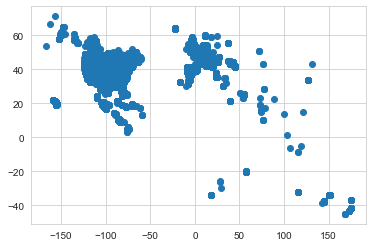

In [110]:
#mapping our location distribution
import matplotlib.pyplot as plt
plt.scatter(x=df['Longitude'], y=df['Latitude'])
plt.show()

Turo platform is active around the globe but most of the listings are located in the USA

In [111]:
df.groupby('Country').size().sort_values(ascending=False).head(10)

Country
US    95264
CA     9269
GB     3160
DE     1398
ES      486
MX      322
FR      254
AE      177
NL      159
IT      150
dtype: int64

## 1.2. MODEL Assumptions


We can assume that the next variables might affects target variable but we also will check later if any of them are relevant:

Car characteristics: 
(I would like to create clusters from these variables after I'll do EDA part
- Type
- Make
- Model
- Color
- Price per day
- Trim
- Transmission
- Fuel type
- Number of seat
- Number of doors
- Year
- GPS
- Convertible

Location
- Latitude 
- Longtitude
    (location clusters with k-means or hierarh)
    
Owner Performance 
- Owner rate 
- 5 star hosts

Behavioral
- Booking instantly
- Delivery fees
- Miles included
- Airoport delivery

Text
- Description
- Guidelines

  Text mining options:
    1) variable that have amount of symbols
    2) bag of words model
    3) td-idf

Extras that can affect: 
- highValueVehicle
- minimumAgeInYearsToRent 
- Registration date
- Trip Count
- Vehicle protection

## TARGET VARIABLE 

In this chapter we will define our target variable and drop all listing that doesn't have any booking in 3 previous months

#We remove all the listings that were unavailable the whole month
df = df[df['Another Occupancy Feb']<29]
df = df[df['Another Occupancy Jan']<31]
df = df[df['Another Occupancy Dec']<31]

In [112]:
df = df.loc[((df['Another Occupancy Feb']<29) | (df['Another Occupancy Jan']<31) | (df['Another Occupancy Dec']<31)),:]

In [113]:
df

,Car ID,URL,Make,Model,Trim,Year,Color,Transmission,Fuel Type,Number of seats,...,Another Occupancy Apr,Another Occupancy May,Another Occupancy Jun,Another Occupancy Jul,Another Occupancy Aug,Another Occupancy Sep,Another Occupancy Oct,Another Occupancy Nov,Another Occupancy Dec,Processed
1,279,https://turo.com/gb/en/car-rental/united-state...,Porsche,911,Carrera S,2006.0,GRAY,M,Gas,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
37,14014,https://turo.com/gb/en/car-rental/united-state...,Ford,Mustang,NaN,2012.0,BLACK,A,NaN,NaN,...,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,22.0,True
38,14752,https://turo.com/gb/en/suv-rental/united-state...,Jeep,Cherokee,Limited,2018.0,BLACK,A,Gas,5.0,...,NaN,19.0,5.0,9.0,5.0,4.0,12.0,17.0,11.0,True
50,18558,https://turo.com/gb/en/car-rental/united-state...,Honda,Civic,NaN,2001.0,SILVER,A,Gas,5.0,...,NaN,NaN,8.0,19.0,5.0,14.0,NaN,NaN,10.0,True
56,20982,https://turo.com/gb/en/car-rental/united-state...,Toyota,Camry Solara,SLE V6,2006.0,RED,A,Gas,4.0,...,5.0,13.0,2.0,6.0,2.0,2.0,21.0,28.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106083,764720,https://turo.com/gb/en/car-rental/united-state...,Chrysler,200,C,2015.0,NaN,A,Gas,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
106105,764782,https://turo.com/gb/en/car-rental/united-state...,Volkswagen,Passat,NaN,2014.0,WHITE,A,Diesel,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
106108,764793,https://turo.com/gb/en/car-rental/united-state...,Chrysler,200,Touring,2012.0,GRAY,A,Gas,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
106148,764917,https://turo.com/gb/en/car-rental/united-state...,BMW,5 Series,528i,2016.0,NaN,A,Gas,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [114]:
df['Ut_Feb'] = (df['Occupancy Feb ']+1-df['Another Occupancy Feb'])/(29-df['Another Occupancy Feb'])
df['Ut_Feb'] = np.clip(df['Ut_Feb'], a_max=1, a_min=0)
df['Ut_Jan'] = (df['Occupancy Jan']+2-df['Another Occupancy Jan'])/(31-df['Another Occupancy Jan'])
df['Ut_Jan'] = np.clip(df['Ut_Jan'], a_max=1, a_min=0)
df['Ut_Dec'] = (df['Occupancy Dec']+2-df['Another Occupancy Dec'])/(31-df['Another Occupancy Dec'])
df['Ut_Dec'] = np.clip(df['Ut_Dec'], a_max=1, a_min=0)

In [115]:
col = df.loc[: , "Ut_Feb":"Ut_Dec"]
df['Ut_R'] = col.mean(axis=1)

In [116]:
#drop all emply rows since we won't be able to use them
df = df.dropna(subset=['Ut_R'])

In [117]:
#Let's decrease the amount of variables to work with (we're not going to use booking results anymore from previous months)
df = df[['Car ID', 'Year', 'Number of seats', 'Number of doors', 'GPS',
       'Convertible', 'Booking Instantly ', 'Latitude', 'Longitude',
       'Owner ID', 'Price per day',
       'Distance Included/day, Miles, KM', 'Distance Included/Week, Miles, KM',
       'Distance Included/Monthy, Miles, KM', 'Booking Discount - Weekly',
       'Booking Discount - Monthly', 'Fee for extra mile, $', 'Trip Count',
       'Reviews number', 'Owner rate',
       'numberOfFaqs', 'minimumAgeInYearsToRent',
       'numberOfFavorites', 'highValueVehicle', 'allStarHost', 'Ut_R', 'URL',
    'Make', 'Model', 'Trim', 'Color', 'Transmission', 'Fuel Type',
       'Status', 'City', 'State', 'ZIP Code', 'Country', 'Owner',
       'Custom Delivery fee', 'Registration date', 'Vehicle protection',
       'Type', 'Description', 'Guidelines']]

# EDA_Variables

In [118]:
#Let's split all the variables into 'nimerical' and 'categorical'
non_numeric_columns = df.select_dtypes(['object']).columns
print(non_numeric_columns)
print("The number of non-numerical columns is {}".format(len(non_numeric_columns)))

Index(['highValueVehicle', 'allStarHost', 'URL', 'Make', 'Model', 'Trim',
       'Color', 'Transmission', 'Fuel Type', 'Status', 'City', 'State',
       'ZIP Code', 'Country', 'Owner', 'Custom Delivery fee',
       'Registration date', 'Vehicle protection', 'Type', 'Description',
       'Guidelines'],
      dtype='object')
The number of non-numerical columns is 21


In [119]:
numeric_columns = df.select_dtypes(['int64', 'float64']).columns
print(numeric_columns)
print("The number of numerical columns is {}".format(len(numeric_columns)))

Index(['Car ID', 'Year', 'Number of seats', 'Number of doors', 'GPS',
       'Convertible', 'Booking Instantly ', 'Latitude', 'Longitude',
       'Owner ID', 'Price per day', 'Distance Included/day, Miles, KM',
       'Distance Included/Week, Miles, KM',
       'Distance Included/Monthy, Miles, KM', 'Booking Discount - Weekly',
       'Booking Discount - Monthly', 'Fee for extra mile, $', 'Trip Count',
       'Reviews number', 'Owner rate', 'numberOfFaqs',
       'minimumAgeInYearsToRent', 'numberOfFavorites', 'Ut_R'],
      dtype='object')
The number of numerical columns is 24


Transform some of the variable into numerical

#### High Value Vahicle (0/1)

In [120]:
df['highValueVehicle'].unique()

array([False, True], dtype=object)

In [121]:
df['highValueVehicle'] = (df['highValueVehicle'] == True ).astype(int)

In [122]:
df['Car ID'].groupby(df['highValueVehicle']).count()

highValueVehicle
0    26778
1     2226
Name: Car ID, dtype: int64

#### All Star Host (Y/N)

In [123]:
df['allStarHost'].unique()

array([True, False], dtype=object)

In [124]:
df['allStarHost'] = (df['allStarHost'] == True ).astype(int)

#### Delivery fee

In [125]:
df['Custom Delivery fee'].unique ()

array([nan, 'US$50', 'US$40', 'US$80', 'US$70', 'US$120', 'US$20',
       'US$75', 'US$60', 'US$15', 'US$30', 'Free', 'US$100', 'US$90',
       'US$10', 'US$35', 'US$65', 'US$45', 'US$25', 'US$95', 'US$5',
       'CA$20', 'CA$40', 'CA$50', 'US$85', 'CA$60', 'US$110', 'CA$70',
       'CA$80', 'CA$30', 'US$55', 'CA$75', 'CA$85', 'US$105', '£60',
       'CA$10', '£120', 'CA$120', 'CA$55', '£90', 'CA$25', 'CA$65',
       'CA$100', '45', '100', '20', '120', '35', '15', 'US$115', '50',
       'CA$110', '30', 'CA$45', '£95', 'CA$35', '10', 'CA$90', '£50',
       '£30', '£40', '£100', '25', '£75', '£5', '£10', '5', '£20', '£45',
       '£25', '90', '£15', '40', '£35', 'CA$15', '70', '£70', '80', '75',
       '£55', 'CA$95', '95', '£80', '£65', '55', 'CA$5', '60'],
      dtype=object)

In [126]:
#Clean and transform into int
def remove_whitespace(x):
    try:
        # remove spaces inside and outside of string
        x = "".join(x.split())
    except:
        pass
    return x
df['Custom Delivery fee'] = df['Custom Delivery fee'].apply(remove_whitespace)
df['Custom Delivery fee'] = df['Custom Delivery fee'].astype(str)
df['Custom Delivery fee'] = df['Custom Delivery fee'].apply(lambda x: x.replace ('CA', ''))
df['Custom Delivery fee'] = df['Custom Delivery fee'].apply(lambda x: x.replace ('US', ''))
df['Custom Delivery fee'] = df['Custom Delivery fee'].apply(lambda x: x.replace ('$', ''))
df['Custom Delivery fee'] = df['Custom Delivery fee'].apply(lambda x: x.replace ('£', ''))
df['Custom Delivery fee'] = df['Custom Delivery fee'].apply(lambda x: x.replace ('₴', ''))
df['Custom Delivery fee'] = df['Custom Delivery fee'].apply(lambda x: x.replace ('р.', ''))
df['Custom Delivery fee'] = df['Custom Delivery fee'].apply(lambda x: x.replace ('Free', '2'))
df['Custom Delivery fee'] = df['Custom Delivery fee'].fillna(0)


Create Categories for the delivery -

1 - don't do delivery


2 - Free DELIVERY

3 - paid delivery from 1-50


4 - paid delivery from 51-120

In [127]:
def cat_delivery (del_cost):
    if del_cost == 0:
        return 1
    if del_cost == 1:
        return 2
    if del_cost<50:
        return 3
    else:
        return 4
df['Custom Delivery fee'] = df['Custom Delivery fee'].astype(float)
df['Custom Delivery fee'] = df['Custom Delivery fee'].apply(cat_delivery)

#### Make&Model Cleanup

In [128]:
#adjust some text errors
df.Model = df.Model.str.lower()
df.Make = df.Make.str.lower()

In [129]:
df.Make.unique()

array(['porsche', 'ford', 'jeep', 'honda', 'toyota', 'bmw', 'land rover',
       'volkswagen', 'dodge', 'volvo', 'subaru', 'acura', 'fiat',
       'nissan', 'chevrolet', 'audi', 'hyundai', 'lexus', 'tesla',
       'pontiac', 'infiniti', 'ram', 'scion', 'mercedes-benz', 'mazda',
       'cadillac', 'kia', 'jaguar', 'buick', 'mini', 'suzuki', 'smart',
       'gmc', 'mitsubishi', 'lincoln', 'hummer', 'chrysler', 'maserati',
       'mercury', 'alfa romeo', 'aston martin', 'bentley', 'ferrari',
       'lamborghini', 'polaris', 'saturn', 'delorean', 'rolls royce',
       'saab', 'vw', 'opel', 'vauxhall', 'skoda', 'vanderhall',
       'am general', 'dacia', 'rolls-royce', 'renault', 'citroen',
       'karma', 'alfa-romeo', 'seat', 'peugeot', 'mclaren', 'genesis',
       'lotus', 'mg', 'ssangyong', 'can-am', 'perodua', 'lancia',
       'mini (bmw)', 'abarth', 'oldsmobile', 'morgan'], dtype=object)

In [130]:
df.Model.unique() 

array(['911', 'mustang', 'cherokee', 'civic', 'camry solara', 'corolla',
       'element', 'prius', '5 series', 'sienna', 'range rover evoque',
       'tiguan', 'f-150', 'highlander hybrid', 'grand caravan', 's40',
       'outback', 'tsx', 'grand cherokee', 'challenger', 'cr-v', 'tl',
       '500', 'fit', 'z4', 'patriot', 'sentra', 'tahoe', 'a3',
       'silverado 2500hd', 'murano', 'sonata', 'versa', 'gx 470',
       'model s', 'pilot', 'sequoia', 'forester', 'yaris', '3 series',
       'solstice', 'santa fe sport', 'jx', 'rogue', 'camry', '1500', 'xb',
       'c-class', 'cayenne', 'cx-9', 'cruze', 'escalade esv', 'fusion',
       'forte', 'wrangler', 'f-type', 'prius c', 'odyssey', 'vibe',
       'soul', 'model x', 'mx-5 miata', 'sonic', 'a7', 'avalon hybrid',
       'eos', 'lacrosse', 's60', 'a5', 'fj cruiser', 'cooper roadster',
       'jetta', 'sx4', '4 series', 'cooper', 'tacoma', 'gl-class',
       'silverado 1500', 'fortwo', 'cube', 'cla-class', 'tt', 'yukon xl',
       'gx 460

#### Year Categories

In [131]:
def cat_year (year_pr):
    if year_pr < 1990:
        return 1
    if year_pr < 2000:
        return 2
    if year_pr<2016:
        return 3
    else:
        return 4

In [132]:
df['YearCat'] = df['Year'].apply(cat_year)

#### Distance Included

In [133]:

df['Distance Included/day, Miles, KM'] = df['Distance Included/day, Miles, KM'].fillna(10000)
df['Distance Included/Week, Miles, KM'] = df['Distance Included/Week, Miles, KM'].fillna(10000)
df['Distance Included/Monthy, Miles, KM'] = df['Distance Included/Monthy, Miles, KM'].fillna(10000)

#### Non-numerical variables

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

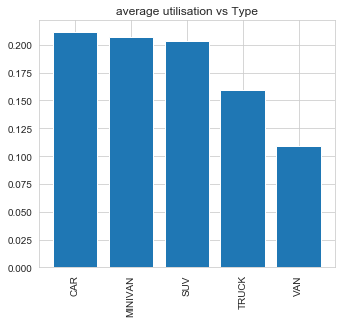

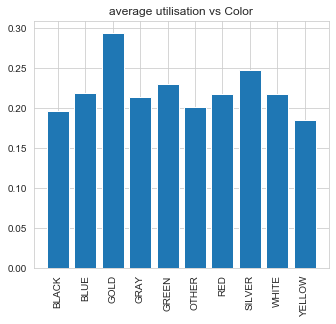

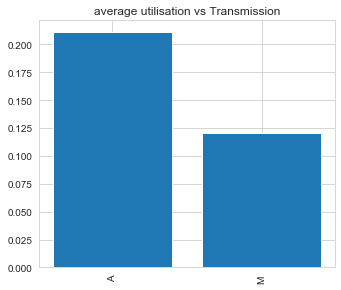

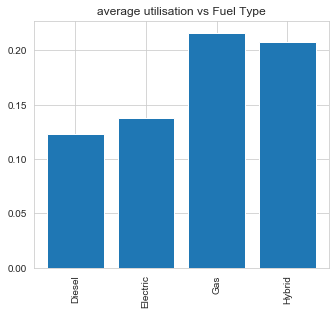

In [134]:
#Let's plot the non-numerical features to check if the variance of the outcome variable is different
plt.figure(figsize=(18, 10))
plt.subplot(2, 3, 1)
plt.bar(df.groupby("Type")
        ["Ut_R"].mean().index, df.groupby("Type")["Ut_R"].mean())
plt.title("average utilisation vs Type")
plt.xticks(rotation="vertical")

plt.figure(figsize=(18, 10))
plt.subplot(2, 3, 1)
plt.bar(df.groupby("Color")
        ["Ut_R"].mean().index, df.groupby("Color")["Ut_R"].mean())
plt.title("average utilisation vs Color")
plt.xticks(rotation="vertical")

plt.figure(figsize=(18, 10))
plt.subplot(2, 3, 1)
plt.bar(df.groupby("Transmission")
        ["Ut_R"].mean().index, df.groupby("Transmission")["Ut_R"].mean())
plt.title("average utilisation vs Transmission")
plt.xticks(rotation="vertical")

plt.figure(figsize=(18, 10))
plt.subplot(2, 3, 1)
plt.bar(df.groupby("Fuel Type")
        ["Ut_R"].mean().index, df.groupby("Fuel Type")["Ut_R"].mean())
plt.title("average utilisation vs Fuel Type")
plt.xticks(rotation="vertical")



Seems like we have some correlation between these variables so definetely will include them in the modeling stage

### Cleaning missing variables

In [135]:
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head (50)

,Total,Percent
Convertible,26382,0.909599
GPS,16739,0.577127
minimumAgeInYearsToRent,15468,0.533306
Guidelines,13683,0.471763
Color,10206,0.351882
Trim,8842,0.304855
Owner rate,3459,0.119259
Number of seats,2262,0.077989
Description,1891,0.065198
Fuel Type,823,0.028375


We have only 10% cars here a convertible and missing values mean 0 and some other variables empty because owner didn't feel it. It's better not to use replace missing values by 0

After dropping the unsignificant colums we will replace all the missing values with 0 since this is what this is mean

In [136]:
#Dropping all the listings without bookings and without any trips. 
df = df.fillna(0)
df = df[df['Ut_R']>0]
df = df[df['Trip Count']>0]

## OUTLIERS

There are only two variables that are not limited and potentially can have outliers. "Price per day" and "Fee for extra mile". Let's check them

Let's check some variables that can have outliers. Hue will be "High value vehicle" since the prices can be significantly different

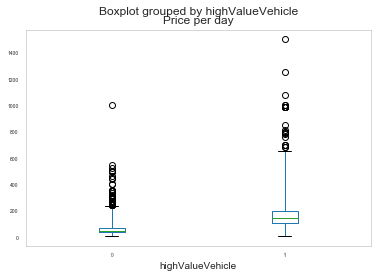

In [137]:
boxplot = df.boxplot(column=['Price per day'], by='highValueVehicle',
                     return_type=None, grid=False, rot=5, fontsize=5, whis=5)

In [138]:
from scipy.stats import mstats

def winsorize_series(group):
    return mstats.winsorize(group, limits=[0,0.05])

groupby_price = df.groupby('highValueVehicle')

In [139]:
df['Price per day_w'] = groupby_price['Price per day'].transform(winsorize_series)

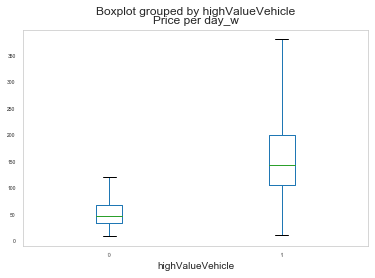

In [140]:
boxplot = df.boxplot(column=['Price per day_w'], by='highValueVehicle',
                     return_type=None, grid=False, rot=5, fontsize=5, whis=5)

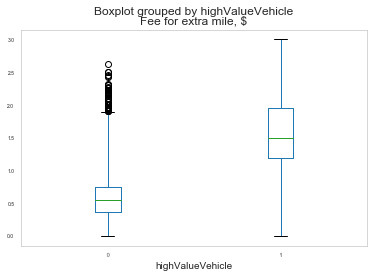

In [141]:
boxplot = df.boxplot(column=['Fee for extra mile, $'], by='highValueVehicle',
                     return_type=None, grid=False, rot=5, fontsize=5, whis=3)

In [142]:
df['Fee for extra mile, $'] = groupby_price['Fee for extra mile, $'].transform(winsorize_series)

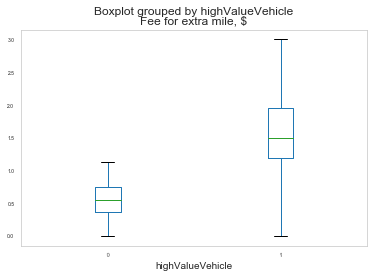

In [143]:
boxplot = df.boxplot(column=['Fee for extra mile, $'], by='highValueVehicle',
                     return_type=None, grid=False, rot=5, fontsize=5, whis=3)

Seems all compact now without outliers

### Correlation between numerical variables

In [144]:
#let's create a new df with fields
corr_df = df[['Ut_R', 'Year', 'Number of seats', 'Number of doors', 'GPS',
       'Convertible', 'Booking Instantly ', 'Price per day_w',
        'Fee for extra mile, $', 'Trip Count',
       'Reviews number', 'Owner rate',"Type",
       'numberOfFaqs', 'minimumAgeInYearsToRent',
       'numberOfFavorites', 'highValueVehicle', 'allStarHost', 'Trim',
       'Status', 'City', 'State', 'ZIP Code', 'Country', 'Owner',
       'Custom Delivery fee', 'Registration date', 'Vehicle protection',
       'Type']]
                       

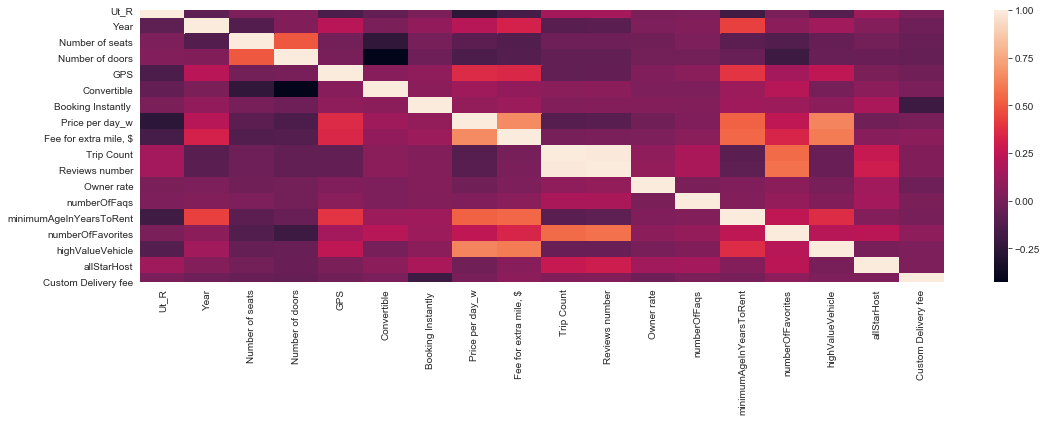

In [145]:
# make the correlation matrices.
                       
plt.figure(figsize=(18,5))

sns.heatmap(corr_df.corr())
plt.show()

We'll focus on the variables that are most correlated with the Utilisation rate

In [146]:
np.abs(df.iloc[:,1:].corr().loc[:,"Ut_R"]).sort_values(ascending=False)

Ut_R                                   1.000000
Price per day_w                        0.254252
Price per day                          0.218965
minimumAgeInYearsToRent                0.180707
Fee for extra mile, $                  0.161033
Trip Count                             0.157625
Reviews number                         0.155327
GPS                                    0.144534
allStarHost                            0.140425
Longitude                              0.127956
highValueVehicle                       0.111008
Latitude                               0.108714
Owner ID                               0.102097
Year                                   0.075756
YearCat                                0.071126
Distance Included/day, Miles, KM       0.061745
Distance Included/Week, Miles, KM      0.061698
Convertible                            0.061106
Booking Discount - Monthly             0.060551
Distance Included/Monthy, Miles, KM    0.059122
Booking Discount - Weekly              0

## 2. Location clustering

We have several features that are responsible for location:
    lat, long, city, zip, country, etc.
    We will create one location variable based on lat and long with a help of clustering tehnique. 

In [147]:
df.groupby('Country').size().sort_values(ascending=False).head(10)

Country
US    18179
CA     1301
GB      489
DE      165
MX       41
ES       30
NZ       28
CR       21
AU       16
DO       10
dtype: int64


For the purpose of the research let's build the model for the USA market only since we will work more on text and there can be potential cultural deviation

In [148]:
df = df[(df.Country == "US")]

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18179 entries, 1 to 105533
Data columns (total 47 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Car ID                               18179 non-null  int64  
 1   Year                                 18179 non-null  float64
 2   Number of seats                      18179 non-null  float64
 3   Number of doors                      18179 non-null  float64
 4   GPS                                  18179 non-null  float64
 5   Convertible                          18179 non-null  float64
 6   Booking Instantly                    18179 non-null  float64
 7   Latitude                             18179 non-null  float64
 8   Longitude                            18179 non-null  float64
 9   Owner ID                             18179 non-null  float64
 10  Price per day                        18179 non-null  float64
 11  Distance Included/day, Mile

The first problem that we're solving is to be able to separate our listings by location. We would like to use k-means because our data has only two variables that are measurements of distance. K-means should be the best fir for it however we're going to validate with other methods as well.

Let's scale the Latitude and Longitude

In [150]:
#Let's scale the variables 
Location = df[['Latitude', 'Longitude']]
scaler = StandardScaler()
Location_std = scaler.fit_transform(Location)

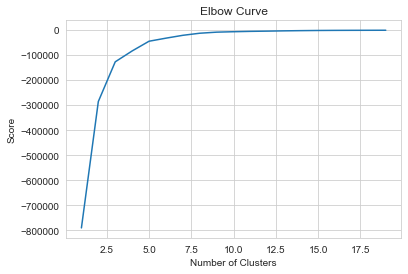

In [151]:
# Variable with the Longitude and Latitude

Z = df[['Car ID','Latitude','Longitude']]
K_clusters = range(1,20)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = df[['Latitude']]
X_axis = df[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize the amount of clusters
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [152]:
#Let's define labels for location
kmeans = KMeans(n_clusters = 8, init ='k-means++')
kmeans.fit(Location_std) # Compute k-means clustering.
Z['cluster_label'] = kmeans.fit_predict(Location_std)
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(Location_std) # Labels of each point

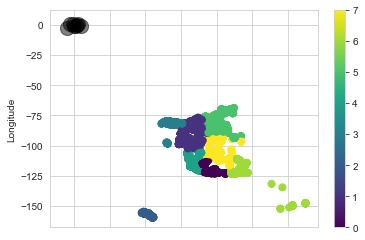

In [153]:
#put them on the plot
Z.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [154]:
#This is our silhouette score for k-means
print(metrics.silhouette_score(Location_std, labels, metric='euclidean'))

0.6720360836225768


In [155]:
from sklearn.cluster import AgglomerativeClustering

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine')
# Fit model
clusters_h = agg_cluster.fit_predict(Location_std)

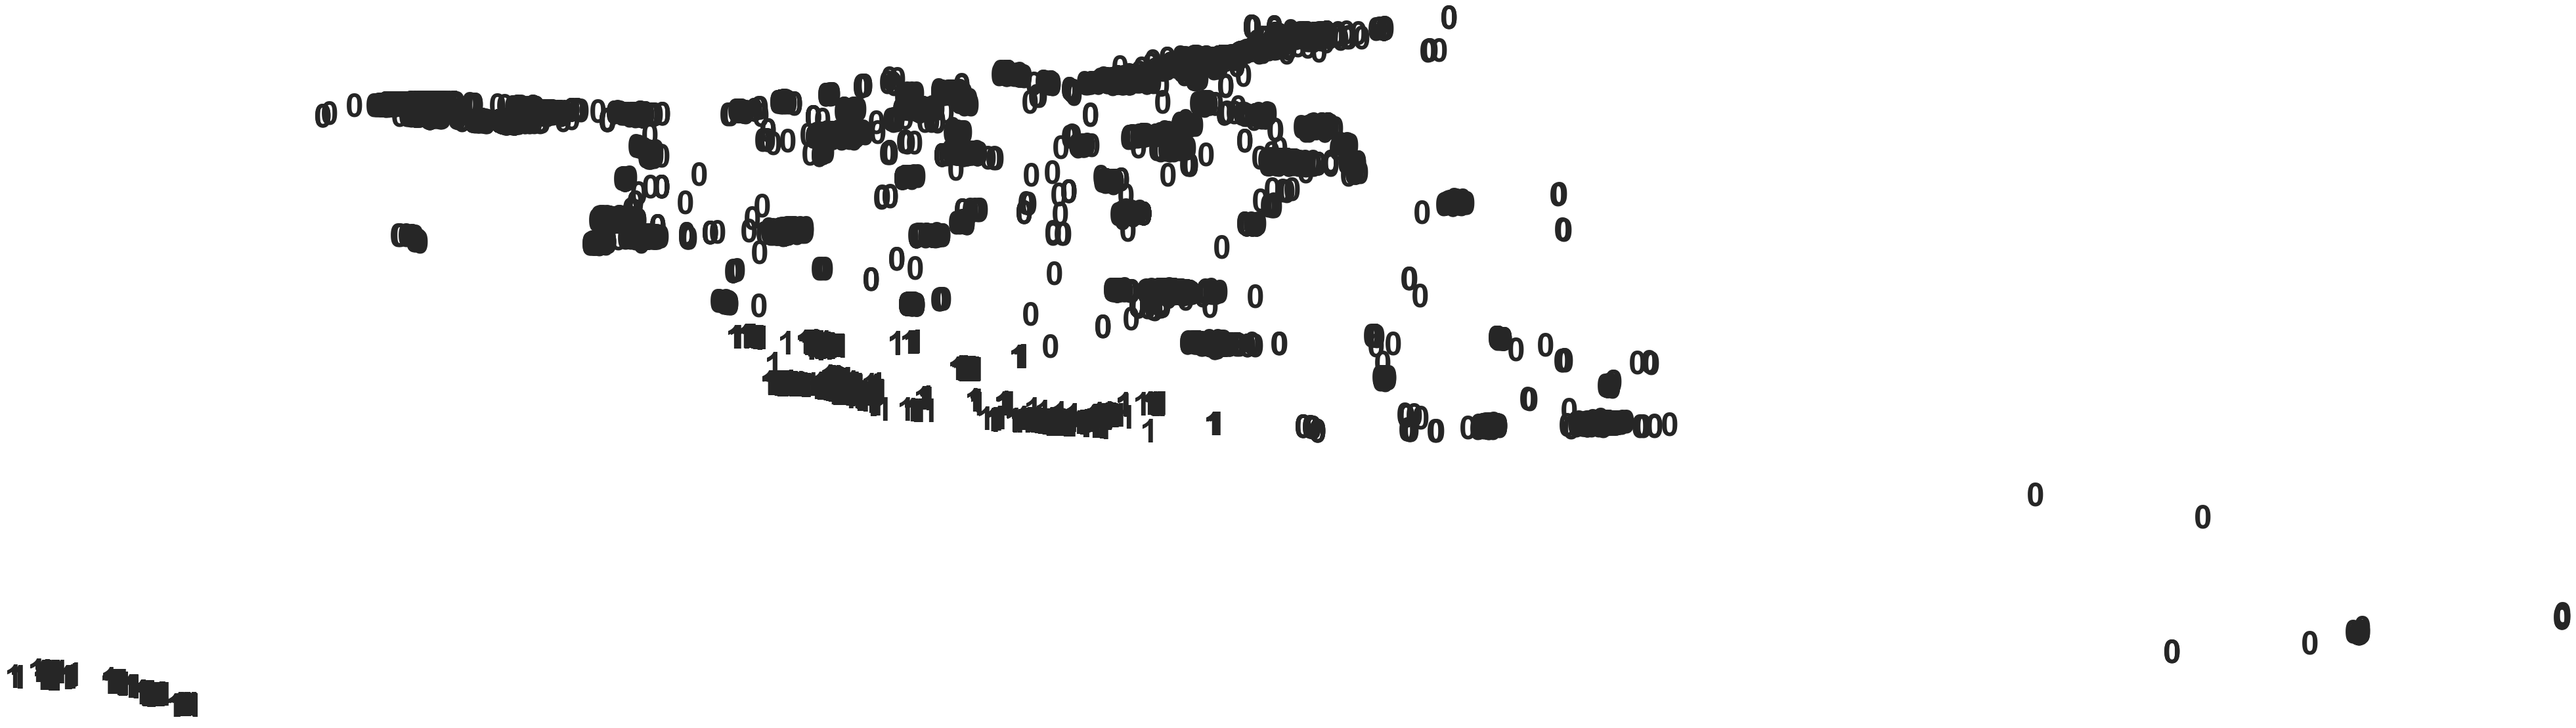

In [156]:
plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(Location_std.shape[0]):
    plt.text(Location_std[i, 0], Location_std[i, 1], str(clusters_h[i]),
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [157]:
print(metrics.silhouette_score(Location_std, clusters_h, metric='euclidean'))

0.3832943606495728


In [158]:
#Let's keep 10 location clusters with kmeans and add them into the dataframe
df = df.merge(Z, left_on='Car ID', right_on='Car ID')
df.head(5)

,Car ID,Year,Number of seats,Number of doors,GPS,Convertible,Booking Instantly,Latitude_x,Longitude_x,Owner ID,...,Registration date,Vehicle protection,Type,Description,Guidelines,YearCat,Price per day_w,Latitude_y,Longitude_y,cluster_label
0,279,2006.0,4.0,2.0,1.0,0.0,0.0,37.578681,-122.363776,5105.0,...,3/5/12 16:57,Turo Standard,CAR,I am excited to rent my 2006 Carrera S with ma...,Absolutely no smoking in or near the vehicle N...,3,120.0,37.578681,-122.363776,0
1,14014,2012.0,0.0,0.0,0.0,1.0,0.0,34.203689,-118.429150,47901.0,...,11/2/12 0:03,Turo Premium,CAR,"Convertible 2012 Mustang for rent! Fun, easy ...",0,3,39.0,34.203689,-118.429150,4
2,14752,2018.0,5.0,4.0,1.0,0.0,0.0,38.925989,-77.025827,49407.0,...,11/8/12 15:39,Turo Standard,SUV,This is a FANTASTIC 2018 Jeep Cherokee with fu...,0,4,50.0,38.925989,-77.025827,5
3,18558,2001.0,5.0,4.0,0.0,0.0,0.0,37.494020,-121.926950,58541.0,...,12/27/12 5:01,Turo Standard,CAR,"Reliable, inexpensive and safe car Safe - Fro...",No smoking,3,20.0,37.494020,-121.926950,0
4,20982,2006.0,4.0,2.0,0.0,1.0,0.0,28.768807,-81.311033,66848.0,...,2/26/13 20:46,Turo Standard,CAR,If you want to have fun in the sun then this r...,No smoking please. Dogs welcome but make sure...,3,30.0,28.768807,-81.311033,3


We will keep our results from k-means score because it had higher silhouette score and convert it into dummies as well

## DATA ANALYTICS FINALLE

In [159]:
#As a result of EDA stage we would like to demonstrate to owners their earnings:
df['Earning_nofee'] = (df['Ut_R']*df['Price per day']*30)*0.75

In [160]:
#Final report for 
df.groupby(['cluster_label'])['State', 'City', 'Make', 'Model','Year','Ut_R', 'Price per day', 'Earning_nofee' ].apply(lambda x: x.nlargest(3, columns=['Earning_nofee']))

State               City          Make     Model    Year  \
cluster_label                                                                  
0             16137    CA          Roseville     chevrolet  corvette  2019.0   
              5110     CA        Morgan Hill         tesla   model 3  2018.0   
              6193     CA         Union City    am general   humvee   1987.0   
1             4700     GA            Atlanta     chevrolet     tahoe  2015.0   
              11656    TX            Leander           kia   sorento  2017.0   
              4427     TX            Houston           bmw        i8  2016.0   
2             10952    HI           Honolulu          audi        r8  2011.0   
              7887     HI             Kailua         tesla   model 3  2018.0   
              9041     HI            Wailuku          jeep  wrangler  2016.0   
3             8206     FL       Jacksonville           bmw        i8  2016.0   
              8069     FL  Sunny Isles Beach      maserati    ghibli  2017.0   
              1328     FL              Miami           bmw        m2  2016.0   
4             9716     CA        Los Angeles  aston martin      db11  2019.0   
              2141     AZ            Phoenix         tesla   model x  2017.0   
              4801     CA          San Diego         tesla   model s  2014.0   
5             5394     NJ            Clifton   lamborghini  gallardo  2007.0   
              320      VA            Ashburn     chevrolet  corvette  2017.0   
              3996     NJ  Stafford Township         dodge     viper  1999.0   
6             11849    WA            Spokane         tesla   model x  2016.0   
              2859     WA         Oak Harbor       porsche   cayenne  2011.0   
              2601     WA         Clyde Hill         tesla   model x  2016.0   
7             6468     CO           Lakewood     chevrolet  suburban  2019.0   
              155      CO   Colorado Springs         tesla   model s  2015.0   
              3952     CO             Denver          audi        q7  2017.0   

                         Ut_R  Price per day  Earning_nofee  
cluster_label                                                
0             16137  0.653846         199.00    2927.596154  
              5110   1.000000         130.00    2925.000000  
              6193   0.250000         500.00    2812.500000  
1             4700   1.000000         330.00    7425.000000  
              11656  0.522727         500.00    5880.681818  
              4427   0.703704         315.00    4987.500000  
2             10952  0.666667         225.00    3375.000000  
              7887   0.500000         250.00    2812.500000  
              9041   1.000000         125.00    2812.500000  
3             8206   1.000000         345.00    7762.500000  
              8069   0.700000         475.00    7481.250000  
              1328   0.517241         450.00    5237.068966  
4             9716   0.478927         549.00    5915.948276  
              2141   0.517241         500.00    5818.965517  
              4801   1.000000         242.25    5450.625000  
5             5394   0.750000         799.00   13483.125000  
              320    0.500000         999.00   11238.750000  
              3996   0.678161         495.00    7553.017241  
6             11849  0.538462         249.00    3016.730769  
              2859   1.000000         125.00    2812.500000  
              2601   0.583333         210.00    2756.250000  
7             6468   1.000000         229.00    5152.500000  
              155    1.000000         151.67    3412.575000  
              3952   1.000000         145.00    3262.500000

In [162]:
df.groupby(['cluster_label'])['State', 'City',  'Make', 'Model','Year','Ut_R', 'Price per day', 'Earning_nofee' ].apply(lambda x: x.nlargest(3, columns=['Earning_nofee']))

State               City          Make     Model    Year  \
cluster_label                                                                  
0             16137    CA          Roseville     chevrolet  corvette  2019.0   
              5110     CA        Morgan Hill         tesla   model 3  2018.0   
              6193     CA         Union City    am general   humvee   1987.0   
1             4700     GA            Atlanta     chevrolet     tahoe  2015.0   
              11656    TX            Leander           kia   sorento  2017.0   
              4427     TX            Houston           bmw        i8  2016.0   
2             10952    HI           Honolulu          audi        r8  2011.0   
              7887     HI             Kailua         tesla   model 3  2018.0   
              9041     HI            Wailuku          jeep  wrangler  2016.0   
3             8206     FL       Jacksonville           bmw        i8  2016.0   
              8069     FL  Sunny Isles Beach      maserati    ghibli  2017.0   
              1328     FL              Miami           bmw        m2  2016.0   
4             9716     CA        Los Angeles  aston martin      db11  2019.0   
              2141     AZ            Phoenix         tesla   model x  2017.0   
              4801     CA          San Diego         tesla   model s  2014.0   
5             5394     NJ            Clifton   lamborghini  gallardo  2007.0   
              320      VA            Ashburn     chevrolet  corvette  2017.0   
              3996     NJ  Stafford Township         dodge     viper  1999.0   
6             11849    WA            Spokane         tesla   model x  2016.0   
              2859     WA         Oak Harbor       porsche   cayenne  2011.0   
              2601     WA         Clyde Hill         tesla   model x  2016.0   
7             6468     CO           Lakewood     chevrolet  suburban  2019.0   
              155      CO   Colorado Springs         tesla   model s  2015.0   
              3952     CO             Denver          audi        q7  2017.0   

                         Ut_R  Price per day  Earning_nofee  
cluster_label                                                
0             16137  0.653846         199.00    2927.596154  
              5110   1.000000         130.00    2925.000000  
              6193   0.250000         500.00    2812.500000  
1             4700   1.000000         330.00    7425.000000  
              11656  0.522727         500.00    5880.681818  
              4427   0.703704         315.00    4987.500000  
2             10952  0.666667         225.00    3375.000000  
              7887   0.500000         250.00    2812.500000  
              9041   1.000000         125.00    2812.500000  
3             8206   1.000000         345.00    7762.500000  
              8069   0.700000         475.00    7481.250000  
              1328   0.517241         450.00    5237.068966  
4             9716   0.478927         549.00    5915.948276  
              2141   0.517241         500.00    5818.965517  
              4801   1.000000         242.25    5450.625000  
5             5394   0.750000         799.00   13483.125000  
              320    0.500000         999.00   11238.750000  
              3996   0.678161         495.00    7553.017241  
6             11849  0.538462         249.00    3016.730769  
              2859   1.000000         125.00    2812.500000  
              2601   0.583333         210.00    2756.250000  
7             6468   1.000000         229.00    5152.500000  
              155    1.000000         151.67    3412.575000  
              3952   1.000000         145.00    3262.500000

This chart is serving for all car owners as an illustration of potential inсome from renting out your car. It is separated by area through the USA. With it they can take an investment decisions, especially about ROI. 

## 3. Natural Language Processing

In this part of EDA we would like to review the "Description" fiels in our dataset and to find any insights that help owner to increase their utilization rate (words, 2 grams)
For this purpose we need to transform the text to words or vectors and then add it into the variable dataset.
1. Simply check correlation between text length and target variable.
2. Create additional variables from text (dummies) to see if there is a correlation between certain words and outcome

In [73]:
# convert into string
df['Description'] = df['Description'].astype(str)

### Length of the String

In [74]:
#first of all let's measure the length of the string and will see if this variable can affect the utilization
df['Description_len']= df['Description'].apply(len)

[Text(0.5, 1.0, 'Description length to Utilization rate')]

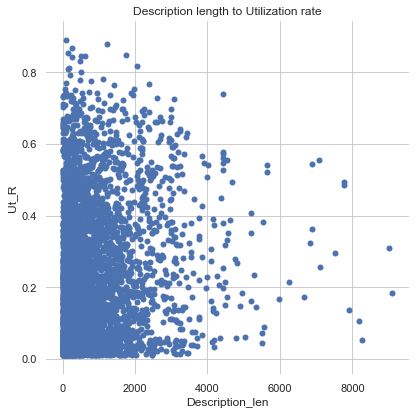

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")


# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="Description_len", y="Ut_R",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax).set(title = "Description length to Utilization rate")

From the plot we can see that all descriptions lenghts are around  2000 words and bigger descriptions doesn'yt lead to better utilisation. can see that bigger amount of symbols doesn't nessesarily lead to the bigger Utilisation rate. Let's try to clean the variable and find a set of words that "successful" owners are using

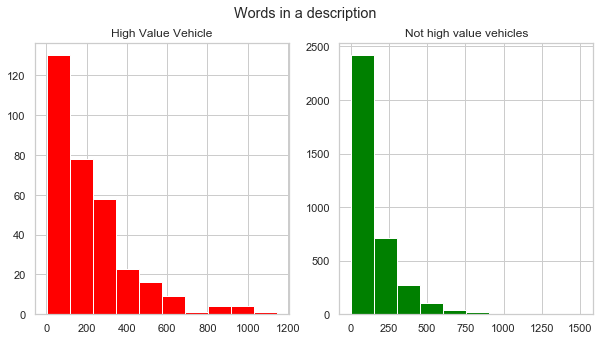

In [76]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
Description_len=df[df['highValueVehicle']==1]['Description'].str.split().map(lambda x: len(x))
ax1.hist(Description_len,color='red')
ax1.set_title('High Value Vehicle')
Description_len=df[df['highValueVehicle']==0]['Description'].str.split().map(lambda x: len(x))
ax2.hist(Description_len,color='green')
ax2.set_title('Not high value vehicles')
fig.suptitle('Words in a description')
plt.show()

### Text preprocessing

In [77]:
df.Description

0       This is a FANTASTIC 2018 Jeep Cherokee with fu...
1       Reliable, inexpensive and safe car  Safe - Fro...
2       - Excellent gas mileage! Saves about $10 for e...
3       Please note that while I can sometimes accommo...
4       Handsome mid-size SUV with spacious interior. ...
                              ...                        
3907    2019 Jeep Wrangler    3.45 Rear Axle Ratio4-Wh...
3908    If you love adventure but still want all the c...
3909    *** COVID-19: We use sanitizing wipes before a...
3910    This car is conveniently located approx 10 mil...
3911    *** COVID-19: We use sanitizing wipes before a...
Name: Description, Length: 3912, dtype: object

In [78]:

#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

#Removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Removing string punctuation
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

#Removing emoji
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Remove _tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

#Convert_ numbers
def convert_numbers(text):
    tokens = word_tokenize(str(text))
    new_text = ""
    for w in tokens:
        try:
            w = num2words(int(w))
        except:
            a = 0
        new_text = new_text + " " + w
    new_text = np.char.replace(new_text, "-", " ")
    return new_text

#Convert_ punctuations
def remove_punctuation(data):
    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    for i in range(len(symbols)):
        data = np.char.replace(data, symbols[i], ' ')
        data = np.char.replace(data, "  ", " ")
    data = np.char.replace(data, ',', '')
    return data

#Lemmatise the words 
#We will use Lemmatization because we would like to keep all the words from english language in their original form, not just the stem
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])


In [79]:
#Apply functions on the description column
df['Description_cl'] = df.Description.str.lower()
df['Description_cl']=df['Description_cl'].apply(lambda text: strip_html(text))
df['Description_cl']=df['Description_cl'].apply(lambda text: remove_html(text))
df['Description_cl']=df['Description_cl'].apply(lambda text: remove_special_characters(text))
df['Description_cl']=df['Description_cl'].apply(lambda text: remove_punctuation(text))
df['Description_cl']=df['Description_cl'].apply(lambda text: remove_emoji(text))
df["Description_cl"] = df["Description_cl"].apply(lambda text: lemmatize_words(text))

In [80]:
df['Description_cl']

0       this is a fantastic 2018 jeep cherokee with fu...
1       reliable inexpensive and safe car safe front a...
2       excellent gas mileage save about 10 for every ...
3       please note that while i can sometimes accommo...
4       handsome midsize suv with spacious interior fi...
                              ...                        
3907    2019 jeep wrangler 345 rear axle ratio4wheel d...
3908    if you love adventure but still want all the c...
3909    covid19 we use sanitizing wipe before and afte...
3910    this car is conveniently located approx 10 mil...
3911    covid19 we use sanitizing wipe before and afte...
Name: Description_cl, Length: 3912, dtype: object

Work on Stopwords

In [81]:
#Tokenization of text
tokenizer=ToktokTokenizer()

#let's checlk stopwords and add some others to them
stopwords = nltk.corpus.stopwords.words('english')
make_stop = df['Make'].unique().tolist()
model_stop = df['Model'].unique().tolist()
new_words='car','vehicle','trip', 'turo', 'drive', 'u', 'ha'
for i in new_words:
    stopwords.append(i) 
for i in make_stop:
    stopwords.append(i) 
for i in model_stop:
    stopwords.append(i) 
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [82]:
def remove_stopwords(data):
    stop_words = stopwords
    words = word_tokenize(str(data))
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text
df['Description_cl']=df['Description_cl'].apply(lambda data:remove_stopwords(data))

In [83]:
df['Description_cl']

0        fantastic 2018 fully loaded feature sleek eno...
1        reliable inexpensive safe safe front sideairb...
2        excellent gas mileage save 10 every day used ...
3        please note sometimes accommodate last minute...
4        handsome midsize suv spacious interior people...
                              ...                        
3907     2019 345 rear axle ratio4wheel disc brakes8 s...
3908     love adventure still want comfort luxury look...
3909     covid19 use sanitizing wipe rental major touc...
3910     conveniently located approx 10 mile se ohare ...
3911     covid19 use sanitizing wipe rental major touc...
Name: Description_cl, Length: 3912, dtype: object

In [84]:
#Let's see the most common words and remove non-significant
from collections import Counter
cnt = Counter()
for text in df["Description_cl"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(30)

[('please', 3384),
 ('seat', 3028),
 ('fee', 1957),
 ('gas', 1698),
 ('airport', 1688),
 ('free', 1658),
 ('rental', 1623),
 ('great', 1514),
 ('time', 1438),
 ('get', 1389),
 ('mile', 1305),
 ('clean', 1262),
 ('charge', 1235),
 ('wheel', 1214),
 ('return', 1174),
 ('new', 1169),
 ('power', 1164),
 ('delivery', 1150),
 ('need', 1114),
 ('parking', 1095),
 ('system', 1086),
 ('available', 1077),
 ('smoking', 1074),
 ('rear', 1043),
 ('take', 1042),
 ('interior', 1039),
 ('front', 1029),
 ('control', 1008),
 ('back', 1006),
 ('leather', 984)]

## WORDCLOUDS

Let's see the wordclouds for our cleaned variable 

In [85]:
Text = df['Description_cl'].values 

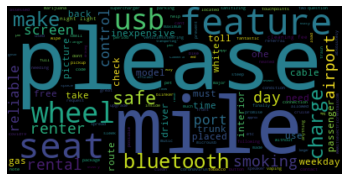

In [86]:

wordcloud = WordCloud().generate(str(Text))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
 

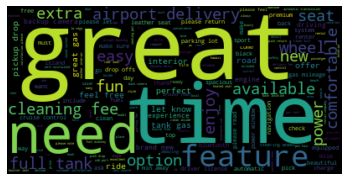

In [87]:
#word cloud for cars that occupied more than 40% per month
df_TOP = df[(df['Ut_R']>0.4)]
Text1 = df_TOP['Description_cl'].values 
wordcloud = WordCloud().generate(str(Text1))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


here we see more words with Great, Need, Time, Feature, Full tank, Airpot Delivery, Power, Fun

### Description Text Generation

With the wide abilities of the text generation we would like to create descriptions from the  listings that has higher utilisation rate. We're going to use Markov's method

In [88]:
nlp = spacy.load('en')

In [89]:
persuasion_generator = markovify.Text(df_TOP['Description'], state_size = 3)

In [90]:
# three randomly generated sentences
for i in range(3):
    print(persuasion_generator.make_sentence())

# three randomly-generated sentences of no more than 100 characters
for i in range(3):
    print(persuasion_generator.make_short_sentence(100))

✅We accept all trip modifications, even if it means buying a new one from dealer!
✅ Full tank of gas when we drop it off in the same day as I bought this Lexus.
You can leave the car for you.
Please use the vehicle in the same condition as you received it; washed, waxed, and fueled.
Upon Requests in the Extras, I do have a cargo top that can be plugged in via component or HDMI.
Enable AutoPilot when it's safe to do so, and the car is available I will approve it.


In [91]:
class POSifiedText(markovify.Text):
    
    def word_split(self, sentence):
        return ["::".join((word.orth_, word.pos_)) for word in nlp(sentence)]

    def word_join(self, words):
        sentence = " ".join(word.split("::")[0] for word in words)
        return sentence

In [75]:
persuasion_generator = POSifiedText(df_TOP['Description'], state_size = 3)

In [76]:
# Print five randomly-generated sentences
for i in range(5):
    print(persuasion_generator.make_sentence())

# Print three randomly-generated sentences of no more than 100 characters
for i in range(3):
    print(persuasion_generator.make_short_sentence(100))

We 'll send you exact pick up and drop off is Doraville MARTA .
At around 30mpg , this is the same thing that would happen with other rental companies .
Please wash and vacuum at end of the rental .
A / C blows ICE cold   Out of town travelers only .
Check them out if you have trouble , I will meet up with you to enhance your visit .
This is an awesome mid - size SUV with lots of leg room and luggage space .
2013 Hyundai Sonata   Please notice that most of our cars are available for a small fee .
4 door sedan with a lot of time cleaning and disinfecting the inside of the vehicle ’s interior .


### TOKENISE

In [92]:
df["Description_tokens"] = df["Description_cl"].apply(nltk.word_tokenize)

#### Bag of Words

We will start with the easiest NLP tool - bag of words. This tool allows us to count the is a representation of text that describes the occurrence of words within a document.

In [93]:
df['Description_tokens']=[" ".join(descr) for descr in df['Description_tokens'].values]

let's reindex our dataframe so we can work later with the bow array

In [94]:
df = df.reset_index(drop=True)

In [95]:
#let's creat a bag of words. We're going to use only "words" and now will check 1 gran
vectorizer = CountVectorizer(analyzer='word', token_pattern = r'\b[^\d\W]+\b')
X = vectorizer.fit_transform(df['Description_tokens'])
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
df_bof = pd.concat([bow_df, df[["Description_tokens", "Ut_R"]]], axis=1)

In [96]:
#this is an illustration of the most common tokens
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies
columns=vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=columns, orient='v')
visualizer.fit(bow_df)
visualizer.show()

ModuleNotFoundError: No module named 'sklearn.metrics.classification'

In [97]:
Y = df_bof['Ut_R']
X = np.array(df_bof.drop(['Description_tokens','Ut_R'], 1))

# We split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=123)

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Models
lr = LinearRegression() 
rfr = RandomForestRegressor()



lr.fit(X_train, y_train)
rfr.fit(X_train, y_train)


print("----------------------Linear Regression Scores----------------------")
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))

print("----------------------Random Forest Scores----------------------")
print('Training set score:', rfr.score(X_train, y_train))
print('\nTest set score:', rfr.score(X_test, y_test))


----------------------Linear Regression Scores----------------------
Training set score: 0.9480332325475386

Test set score: -7.010876234768594e+23
----------------------Random Forest Scores----------------------
Training set score: 0.8391031401122571

Test set score: 0.07428559974666304


Well, obviously it's overfitted and doesn't represent the outcome by itself. We will include these variables into our models with other variables. There is no particular word in the dataset that lead to higher utilization rate.

In [98]:
# let's try bag of words with 2-grams
vectorizer = CountVectorizer(analyzer='word', ngram_range=(2,2), token_pattern = r'\b[^\d\W]+\b')
X = vectorizer.fit_transform(df['Description_tokens'])
bow_2_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
df_bof_2 = pd.concat([bow_df, df[["Description_tokens", "Ut_R"]]], axis=1)
df_bof_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3912 entries, 0 to 3911
Columns: 12846 entries, aaa to Ut_R
dtypes: float64(1), int64(12844), object(1)
memory usage: 383.4+ MB


In [99]:
#Let's see the most commong pair of words
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies
columns=vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=columns, orient='v')
visualizer.fit(bow_df)
visualizer.show()

ModuleNotFoundError: No module named 'sklearn.metrics.classification'

These can be much better results since we've got a very unique set of words such as "arranged pick up", "auto crossing", "allow northwest". Let's quickly make a model to see if there any influence on the outcome variablre just from these results

In [ ]:
Y = df_bof['Ut_R']
X = np.array(df_bof_2.drop(['Description_tokens','Ut_R'], 1))

# We split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=123)

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Models
lr = LinearRegression() 
rfr = RandomForestRegressor()



lr.fit(X_train, y_train)
rfr.fit(X_train, y_train)


print("----------------------Linear Regression Scores----------------------")
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))

print("----------------------Random Forest Scores----------------------")
print('Training set score:', rfr.score(X_train, y_train))
print('\nTest set score:', rfr.score(X_test, y_test))

Obviously not very successful but we will add it into the model on the next stage, results are close to 1 gram

### TF-IDF

Another way of creating dummy variables for the text variable is TF-IDF. The BoW approach rests upon counting the occurrences of the words in the descriptions while we can also include the matrix of the frequencies these words occuren in the sentences and in the corpus

In [86]:
vectorizer = TfidfVectorizer(
    max_df=0.5, min_df=2, ngram_range=(2,2), token_pattern = r'\b[^\d\W]+\b', use_idf=True, norm=u'l2', smooth_idf=True)
#we're using only words that occur no less than 2 times and drop the words that occur in more than half of the document

# applying the vectorizer
X = vectorizer.fit_transform(df['Description_tokens'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
df_tfidf = pd.concat([tfidf_df, df[['Description_tokens', 'Ut_R']]], axis=1)

# keep in mind that the log base 2 of 1 is 0,
# so a tf-idf score of 0 indicates that the word was present once in that sentence.
tfidf_df.head()

,aac dual,ab air,ab bluetooth,ab brake,ab break,ab disc,ab driveline,ab emergency,ab front,ab keyless,...,zone frontcrumple,zone hour,zone rearairbags,zone similar,zoo sd,zoo yosemitenational,zoom need,zoom right,zoom toll,zoom zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
tfidf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3912 entries, 0 to 3911
Columns: 38918 entries, aac dual to zoom zoom
dtypes: float64(38918)
memory usage: 1.1 GB


In [88]:
Y = df_tfidf['Ut_R']
X = np.array(df_tfidf.drop(['Description_tokens','Ut_R'], 1))

# We split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=123)


# Models
lr = LinearRegression() 
rfr = RandomForestRegressor()



lr.fit(X_train, y_train)
rfr.fit(X_train, y_train)


print("----------------------Linear Regression Scores----------------------")
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))

print("----------------------Random Forest Scores----------------------")
print('Training set score:', rfr.score(X_train, y_train))
print('\nTest set score:', rfr.score(X_test, y_test))

----------------------Linear Regression Scores----------------------
Training set score: -2.8164463498157506

Test set score: -6.2199227359332e+26
----------------------Random Forest Scores----------------------
Training set score: 0.791299677904126

Test set score: 0.05506055870297033


#### TF-IDF vectorization

This allows us to create a vector from features and based on it to measure similarity between the descriptions. It creates vectors from nearby words but don't count synonyms 

In [89]:
X_train, X_test = train_test_split(df['Description_tokens'], test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
df_tfidf=vectorizer.fit_transform(df['Description_tokens'])
print("Number of features: %d" % df_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(df_tfidf, test_size=0.4, random_state=0)

#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', df['Description_tokens'][5])
print('Tf_idf vector:', tfidf_bypara[5])

Number of features: 8408
Original sentence: great gas efficient family sunny san diego surprisingly spacious back seat folded extra trunk space sleeping area perfect lift hatch enjoy san diegos beautiful sunset always able tight parking space usb input iphones aux input android
Tf_idf vector: {'audiobluetooth': 0.29584286117495256, '28': 0.2215234865629537, 'interface': 0.21667597118901413, 'seeking': 0.2614672409516017, '23': 0.21238374532128976, 'carplay': 0.15816073398929767, 'apple': 0.13632230155630665, 'crossover': 0.20853256567757442, '31': 0.2094589352709815, 'tinted': 0.1553975668417829, 'economy': 0.15241175955894076, 'auto': 0.1312127310571613, 'youre': 0.13462563395998414, 'offer': 0.1271320773319354, 'audio': 0.12499933179714623, 'android': 0.15366241078006665, 'mpg': 0.1315638980113081, 'suv': 0.12412115239963341, 'exterior': 0.13740587326358206, 'fuel': 0.11410803642739457, 'interior': 0.0968371108338104, 'window': 0.12214863977360335, 'city': 0.12862439018908012, 'highw

#### Latent Semantic Analysis

In [210]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 1379 to 130.
svd= TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('-------COMPONENT {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:5])
    print("-------------------------------------------------------------")

Percent variance captured by all components: 34.22361690049173
-------COMPONENT 0:
Description_tokens
try brand new black black leather seater luxury lt looking hotel try airbnb following link get reward httpswwwairbnbcommanageyourspace19983099details httpswwwairbnbcomcmateens15currencyusd premium luxury package absolutely luxurious almost brand new seater luxury suv resist fell love black beauty luxury everything need business pleasure houston provides smooth predictable driving experience youre planning houston surrounding city must luxury suv top feature live support button amfm aux satellite radio sxm usb rear view camera parking distance control front dual zone ac cruise control distance limit technology antitheft device comfort access keyless entry tilt steering wheel autodimming rear view mirror leather seat heated seat front seat remote start memory seat power front seat collision control auto mechanism side sensor satisfaction guaranteed everything possibly make every renter h

Based on components we need to try something else as well

### word2vec

word2vec is trains a shallow neural network model in an unsupervised manner for converting words to vectors.

In [102]:
# Load Google's pre-trained Word2Vec model.
model_pretrained = gensim.models.KeyedVectors.load_word2vec_format(
    'https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [103]:
word2vec_arr = np.zeros((df.shape[0],300))

for i, sentence in enumerate(df['Description_tokens']):
  try:
    word2vec_arr[i,:] = np.mean([model_pretrained[lemma] for lemma in sentence], axis=0)
  except KeyError:
    word2vec_arr[i,:] = np.full((1,300), np.nan)
    continue

word2vec_arr = pd.DataFrame(word2vec_arr)
df_wv = pd.concat([df[["Ut_R", "Description_tokens"]],word2vec_arr], axis=1)
df_wv = df_wv.fillna(0)

print("Shape of the dataset: {}".format(df_wv.shape))
df_wv.head(10)

Shape of the dataset: (3912, 302)


,Ut_R,Description_tokens,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0.155556,fantastic 2018 fully loaded feature sleek enou...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.027778,reliable inexpensive safe safe front sideairba...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.086207,excellent gas mileage save 10 every day used m...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.031818,please note sometimes accommodate last minute ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.095238,handsome midsize suv spacious interior people ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.166667,great gas efficient family sunny san diego sur...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.675743,welcome smooth ride iii wont win racing award ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.320106,hey crazy right still rent thing differently a...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.651557,apology im able deliverpickup time location nu...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.115942,equipped sirius radio speaker audio system cd ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Let's use this array in the model

# BUILD THE MODEL (CLASSIFIER)

In [170]:
#Convert text variables into dummies
df = pd.concat([df,pd.get_dummies(df.Type, prefix="Type", drop_first=True)], axis=1)
df = pd.concat([df,pd.get_dummies(df.Color, prefix="Color", drop_first=True)], axis=1)
df = pd.concat([df,pd.get_dummies(df.Transmission, prefix="Trans", drop_first=True)], axis=1)
df = pd.concat([df,pd.get_dummies(df['Fuel Type'], prefix="Fuel", drop_first=True)], axis=1)
df = pd.concat([df,pd.get_dummies(df.Make, prefix="Make", drop_first=True)], axis=1)
df = pd.concat([df,pd.get_dummies(df.cluster_label, prefix="cluster", drop_first=True)], axis=1)

In [171]:
dummy_column_names = list(pd.get_dummies(df.Type, prefix="Type", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(df.Color, prefix="Color", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(df.Transmission, prefix="Trans", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(df['Fuel Type'], prefix="Fuel", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(df['Make'], prefix="Make", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(df['cluster_label'], prefix="cluster", drop_first=True).columns)


In [172]:
#create labels  for UR variable,we will be working on creation of the logistic regressions
def cat_car(ut_r):
    if ut_r < 0:
        return 1
    if ut_r < 0.06:
        return 2
    if ut_r < 0.17:
        return 3
    if ut_r < 0.34:
        return 4
    else:
        return 5
#apply categorisation function
df['Ut_R_cat'] = df['Ut_R'].apply(lambda x: cat_car(x))

## 8.2. MODELS

In [173]:
#Let's check the variables without text

In [174]:
# Y is the target variable
Y = df['Ut_R_cat']
# X is the feature set which includes:
X = df[[ 'YearCat', 'Number of seats','Number of doors', 'GPS',
       'Convertible', 'Booking Instantly ', 'Price per day_w',
       'Distance Included/day, Miles, KM', 'Distance Included/Week, Miles, KM',
       'Distance Included/Monthy, Miles, KM', 'Booking Discount - Weekly',
       'Booking Discount - Monthly', 'Fee for extra mile, $', 'Trip Count',
       'Reviews number', 'Owner rate',
       'numberOfFaqs', 'minimumAgeInYearsToRent',
       'numberOfFavorites', 'highValueVehicle', 'allStarHost',]+ dummy_column_names]

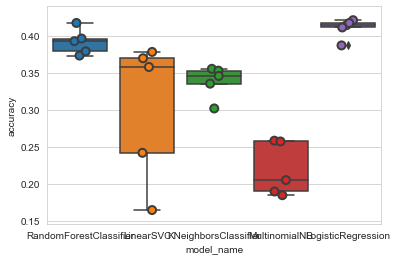

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    KNeighborsClassifier(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X, Y, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [176]:
cv_df.groupby('model_name').accuracy.mean()

model_name
KNeighborsClassifier      0.338465
LinearSVC                 0.302654
LogisticRegression        0.410474
MultinomialNB             0.219152
RandomForestClassifier    0.391992
Name: accuracy, dtype: float64

The Random Forest Classifier seems like the most promising one so lets do the grid search for the 

In [122]:
model = RandomForestClassifier()

In [123]:
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, Y, df.index, test_size=0.33, random_state=0)

In [124]:
y_test.value_counts()

4    359
5    336
3    327
2    269
Name: Ut_R_cat, dtype: int64

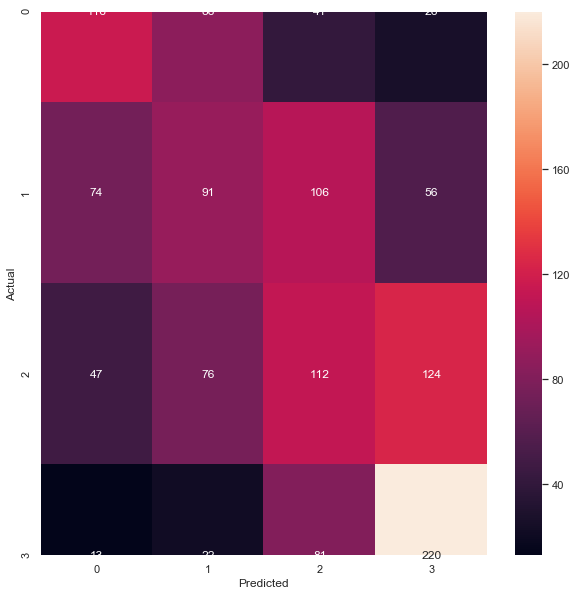

In [132]:
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, Y, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [133]:
import pickle
with open('car_model.pkl', 'wb') as file:
pickle.dump(model, file)

IndentationError: expected an indented block (<ipython-input-133-af0a89f81fb1>, line 3)

There is some overfitting happening but let's remove all the variables with high P-value

We still have the overfitting so let's try to

###### On a positive not let's say that at least we're explain 26 % of the outcome and no overfitting. 

In [ ]:
#Let's add the text variable to the incoming variables

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size = 0.2)
X_test = sm.add_constant(X_test)

# We are making predictions
y_preds = results.predict(X_test)

# We fit an OLS model using sklearn
lrm = LinearRegression()
lrm.fit(X_train, y_train)
print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))

R-squared of the model in the training set is: 0.2940392382137156
R-squared of the model in the test set is: 0.21053538043674802


## Multi Layer Perceptron model

The power of neural networks come from their ability to learn the representation in the training data and how to best relate it to the output variable that you want to predict. We will try to use MLP model as well as Random Forest Classifier and compare the performance

In [416]:
# Import the model.
from sklearn.neural_network import MLPRegressor

# Establish and fit the model, with a single, 1000 perceptron layer.
mlp = MLPRegressor(hidden_layer_sizes=(200,))


In [417]:
mlp.fit(X_s, Y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(200,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [418]:
mlp.score(X_s, Y)

0.4131970375816457

In [419]:
cross_val_score(mlp, X_s, Y, cv=5)

array([ -0.47205524, -34.21080892,  -1.28201089, -38.66200575,
        -0.56003664])

Our amount of data isn't enough for neural network that's why model become too overfitted

### Conclusions:  

In this project we:

1) reviewed all the available variables that are accessible through public sources for car sharing market, processed them and analysed.
2) were able to cluster them and present top relevant results so potential car owner can evaluate their potential ability in certain areas based on the best performers results.
3) were able to explain the variance of the utilisation rate with these variables and got 30% with different models which is low. However, with the OLS model we were able to define postitve and negative influence of the incoming variables, with Random Forest we were able to predict TOP important variables.

4) Also, we were trying to see if there are certain words or 2 grams that lead to the higher utilization rate or earnings but unfortunately it is not, the models with these variables doesn't seem reliable more. One of the conclusions that owners should keep their description within 2000 symbols and words such as: $Great$, $Need$, $Time$, $Feature$, $Full tank$, $Airpot Delivery$, $Power$, $Fun$. With the help of Markovs module we were able to generate 

The area of car sharing is growing and defining the most important factors for increasing the utility rate is very important for car owners.
As the next step we would like to continue model development plus would like to develop a tool that will allow owners to generate the text based on the best performed listings